In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


### 1a) les inn og forstå dataene

In [4]:
url = "https://raw.githubusercontent.com/propublica/compas-analysis/master/compas-scores-two-years.csv"

df = pd.read_csv(url)

In [5]:
#df.columns
df_select = df[["id", "name", "sex", "age_cat", "race", "two_year_recid", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", "is_recid", "is_violent_recid", "v_decile_score", "score_text" ]]

*Hvilke kolonner skal vi velge?*

id, name, sex, dob, age, race, two_year_recid, , juv_fel_count, juv_misd_count, juv_other_count
priors_count, c_charge_degree, is_recid, r_charge_degree, is_violent_recid, v_decile_score, 

Kanskje:
compas_screening_date, days_b_screening_arrest, type_of_assessment 

### Kolonnenes betydning

- **id:** ID-nummer.

- **name:** kandidatens fulle navn.

- **first:** fornavn.

- **last:** etternavn.

- **compas_screening_date:** dato for undersøkelse.

- **sex:** kjønn.

- **dob:** fødselsdato.

- **age:** alder.

- **age_cat:** alderkategori.

- **v_decile_score:**

- **v_score_text:**

- **v_screening_date:**

- **in_custody:** dato for ivaretektsfengsling

- **out_custody:** dato for løslatelse

- **priors_count.1:**

- **start:**

- **end:**

- **event:**

- **two_year_recid:** hvorvidt kandidaten begikk et nytt lovbrudd innen to år

#### 
#### 
- Hvor ofte ulike grupperinger av mennesker (kvinner, menn, hvite og svarte) gjentar forbrytelser og blir predikert til å begå straffbare handlinger i framtiden (som andel, ikke totalt antall):

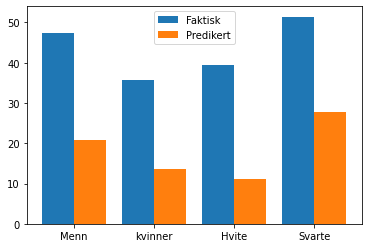

In [6]:
# Velger ut undergrupper for menn, kvinner, hvite og svarte
df_male = df_select[df_select["sex"] == "Male"]
df_female = df_select[df_select["sex"] == "Female"]
df_white = df_select[df_select["race"] == "Caucasian"]
df_black = df_select[df_select["race"] == "African-American"]


# prosent av gruppen som begår en forbrytelse på nytt innen to år
male_recid = len(df_male[df_male["two_year_recid"]==1].index) / len(df_male.index)*100
female_recid = len(df_female[df_female["two_year_recid"]==1].index) / len(df_female.index)*100
white_recid = len(df_white[df_white["two_year_recid"]==1].index) / len(df_white.index)*100
black_recid = len(df_black[df_black["two_year_recid"]==1].index) / len(df_black.index)*100


# velger nivå high som at de predikeres til å begå forbrytelese
male_pred = len(df_male[df_male["score_text"] == "High"].index) / len(df_male.index)*100
female_pred = len(df_female[df_female["score_text"] == "High"].index) / len(df_female.index)*100
white_pred = len(df_white[df_white["score_text"] == "High"].index) / len(df_white.index)*100
black_pred = len(df_black[df_black["score_text"] == "High"].index) / len(df_black.index)*100


labels = ["Menn", "kvinner", "Hvite", "Svarte"]
x = np.arange(len(labels))

y1 =  [male_recid, female_recid, white_recid, black_recid]
y2 = [male_pred, female_pred, white_pred, black_pred]
width = 0.40

plt.bar(x-0.2, y1, width)
plt.bar(x+0.2, y2, width)
plt.xticks(x, labels)
plt.legend(['Faktisk', 'Predikert'])

#### 
#### 
- Hvor ofte ulike grupper fikk ulike risikoskårer:

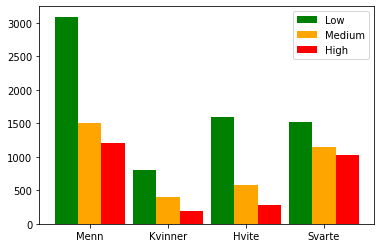

In [30]:
low = [len(df_male[df_male["score_text"] == "Low"].index),
       len(df_female[df_female["score_text"] == "Low"].index),
       len(df_white[df_white["score_text"] == "Low"].index),
       len(df_black[df_black["score_text"] == "Low"].index)]

medium = [len(df_male[df_male["score_text"] == "Medium"].index),
          len(df_female[df_female["score_text"] == "Medium"].index),
          len(df_white[df_white["score_text"] == "Medium"].index),
          len(df_black[df_black["score_text"] == "Medium"].index)]

high = [len(df_male[df_male["score_text"] == "High"].index),
       len(df_female[df_female["score_text"] == "High"].index),
       len(df_white[df_white["score_text"] == "High"].index),
       len(df_black[df_black["score_text"] == "High"].index)]


col_labs = ["Low", "Medium", "High", "h"]
x_labs = ["Menn", "Kvinner", "Hvite" ,"Svarte"]
x = np.arange(len(col_labs))
width = 0.30

# Plotter risikoskårene i grupper ved siden av hverandre
low = plt.bar(x-width, low, width, color='g')
medium = plt.bar(x, medium, width, color='orange')
high = plt.bar(x+width, high, width, color='r')

plt.xticks(x, x_labs)
plt.legend(col_labs)


Plottet ovenfor viser hvor ofte de som begikk straffbare handlinger fikk ulike risikoskårer.

Risikoskårene er prediksjoner for hvor sannsynlig det er at de begår et nytt lovbrudd innen to år.

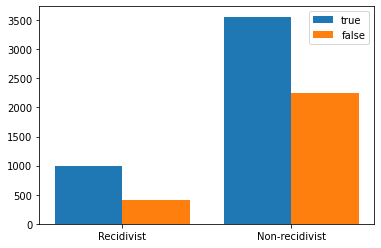

In [8]:

# Gold_pos er de som begikk nye lovbrudd innen to år
gold_pos = df_select[df_select["two_year_recid"] == 1]
gold_neg = df_select[df_select["two_year_recid"] == 0]

# True pos er de som begikk nye lovbrudd og ble predikert til å begå nye lovbrudd
true_pos = gold_pos[gold_pos["score_text"] == "High"]
false_pos = gold_neg[gold_neg["score_text"] == "High"]

true_neg = gold_neg[gold_neg["score_text"] == "Low"] + gold_neg[gold_neg["score_text"] == "Medium"]
false_neg = gold_pos[gold_pos["score_text"] == "Low"] + gold_pos[gold_pos["score_text"] == "Medium"]

col_labs = ["true", "false"]
x_labs = ["Recidivist", "Non-recidivist"]
x = np.arange(len(col_labs))
width = 0.4

plt.bar(x-0.20, [len(true_pos.index), len(true_neg.index)], width)
plt.bar(x+0.20, [len(false_pos.index), len(false_neg.index)], width)

plt.xticks(x, x_labs)
plt.legend(col_labs)

#### 
#### 
- Hvordan de som begikk nye straffbare handlinger (og de som ikke gjorde det) fikk ulike risikoskårer - hvite versus svarte:

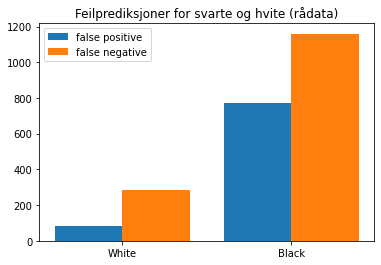

In [9]:
gold_pos_white = gold_pos[gold_pos["race"] == "Caucasian"]
gold_pos_black = gold_pos[gold_pos["race"] == "African-American"]
gold_neg_white = gold_neg[gold_neg["race"] == "Caucasian"]
gold_neg_black = gold_neg[gold_neg["race"] == "African-American"]

false_pos_white = gold_neg_white[gold_neg_white["score_text"] == "High"]
false_pos_black = gold_neg_black[gold_neg_black["score_text"] == "High"]

false_neg_white = gold_pos_white[gold_pos_white["score_text"] == "Low"] + gold_pos_white[gold_pos_white["score_text"] == "Medium"]
false_neg_black = gold_pos_black[gold_pos_black["score_text"] == "Low"] + gold_pos_black[gold_pos_black["score_text"] == "Medium"]

col_labs = ["false positive", "false negative"]
x_labs = ["White", "Black"]
x = np.arange(len(col_labs))
width = 0.4

plt.bar(x-0.2, [len(false_pos_white.index), len(false_neg_white.index)], width)
plt.bar(x+0.2, [len(false_pos_black.index), len(false_neg_black.index)], width)

plt.xticks(x, x_labs)
plt.title("Feilprediksjoner for svarte og hvite (rådata)")
plt.legend(col_labs)

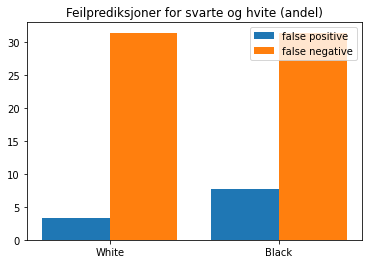

In [31]:
pos_white_ratio = len(false_pos_white.index) / len(df_white.index) * 100
pos_black_ratio = len(false_pos_black.index) / len(df_black.index) * 100
neg_white_ratio = len(false_neg_white.index) / len(df_white.index) * 100
neg_black_ratio = len(false_neg_black.index) / len(df_black.index) * 100

col_labs = ["false positive", "false negative"]
x_labs = ["White", "Black"]
x = np.arange(len(col_labs))
width = 0.4

plt.bar(x-0.2, [pos_white_ratio, pos_black_ratio], width)
plt.bar(x+0.2, [neg_white_ratio, neg_black_ratio], width)

plt.xticks(x, x_labs)
plt.title("Feilprediksjoner for svarte og hvite (andel)")
plt.legend(col_labs)

### 1 d)

In [34]:
# Velger ut data for å trene modeller, med og uten COMPAS-data
X_compas = df_select.drop(columns = ['id','name','two_year_recid', "is_violent_recid", "is_recid"])
X_pure = X_compas.drop(columns = ["score_text", "v_decile_score"])

categorical_cols_X_compas = ['sex', 'age_cat', 'race', "score_text"] # skal konverteres til kategoriske vha one-hot encoding
numerical_cols_X_compas = [el for el in X_compas.columns if el not in categorical_cols_X_compas] #skal konverteres til arrays av int

#Konverterer verdier til kategoriske vha one-hot-encoding
X_compas = pd.get_dummies(X_compas, columns=categorical_cols_X_compas, prefix=categorical_cols_X_compas, prefix_sep='_')

categorical_cols_X_pure = ['sex', 'age_cat', 'race']
numerical_cols_X_pure = [el for el in X_pure.columns if el not in categorical_cols_X_pure] #lager en liste av alle som ikke skal være kategoriske

#Konverterer verdier til kategoriske vha one-hot-encoding
X_pure = pd.get_dummies(X_pure, columns=categorical_cols_X_pure, prefix=categorical_cols_X_pure, prefix_sep='_')


#Det som skal predikeres
Y = df_select[["two_year_recid"]]
Y = np.ravel(Y)

#konverterer numeriske verdier til numpy-array av int
for col in numerical_cols_X_compas:
    X_compas[col] = X_compas[[col]].to_numpy()

for col in numerical_cols_X_pure:
    X_pure[col] = X_pure[[col]].to_numpy()

    

In [13]:
#Model som predikerer uten COMPAS-data og model som predikerer utifra COMPAS

#logistisk regresjonsmodell

#Pure
Xp_train, Xp_test, Y_train, Y_test = train_test_split(X_pure, Y, test_size = 0.2, random_state = 0)
log_reg_pure = LogisticRegression(max_iter=1000)

log_reg_pure.fit(Xp_train, Y_train)

log_reg_pure.predict(Xp_train)
log_reg_pure.predict_proba(Xp_train)

#Compas
Xc_train, Xc_test, Y_train, Y_test = train_test_split(X_compas, Y, test_size = 0.2, random_state = 0)
log_reg_compas = LogisticRegression(max_iter=1000)

log_reg_compas.fit(Xc_train, Y_train)

log_reg_compas.predict(Xc_train)
log_reg_compas.predict_proba(Xc_train)



array([[0.39133231, 0.60866769],
       [0.78669391, 0.21330609],
       [0.71308162, 0.28691838],
       ...,
       [0.54087973, 0.45912027],
       [0.16837349, 0.83162651],
       [0.63181081, 0.36818919]])

In [35]:
#Tester treffsikkerheten til modellene 

#pure
print(log_reg_pure.score(Xp_test, Y_test))

#Compas
print(log_reg_compas.score(Xc_test, Y_test))

0.6604296604296604
0.6805266805266805


In [36]:
#Lager confusion matrix for de ulike gruppene for pure
y_pred = log_reg_pure.predict(X_pure)

tn, fp, fn, tp = confusion_matrix(Y, y_pred).ravel()
print(f"Antallet sanne negative er {tn}, antallet falske positive er {fp}, antallet falske negative er {fn} og antallet sanne positive er {tp}.")

Antallet sanne negative er 3093, antallet falske positive er 870, antallet falske negative er 1549 og antallet sanne positive er 1702.


In [37]:
# plotter "partial dependence"
features = ["priors_count" '''flere parametre her''']

PartialDependenceDisplay.from_estimator('''klassifikator her''', df_select, features)

plt.gcf().set_size_inches(15, 10)
plt.show()

ValueError: Feature priors_countflere parametre her not in feature_names